# LF JSON tester

In [53]:
%pylab inline
import vocalsims.interfacing.json_object as jso
import vocalsims.glottis.lf_model as lfm
import sympy as sy
from jsonpath_ng import jsonpath, parse
import json

Populating the interactive namespace from numpy and matplotlib


In [54]:
with open('../parameters/lf_model_params_Karlsson1996.json') as f:
    modjs = json.load(f)
   
mods = jso.JSONObject(modjs)

with open('../parameters/lf_model_parameter_desc.json') as f:
    modescjs = json.load(f)

In [55]:
kpars= ['F0','RG','RE','RA','OQ']
labs = [ 'gender','Mode']

t = np.linspace(0,1,100)
figure()

for x in jexp.input(modjs):
    thispars = {pp:x[pp] for pp in kpars}
    thislab = ' '.join(x[pp] for pp in labs)
    lf=lfm.LFModel()
    lf.from_karlsson(**thispars)
    plot(t/thispars['F0'],lf(t), label=thislab)

legend()

KeyError: 'F0'

<Figure size 432x288 with 0 Axes>

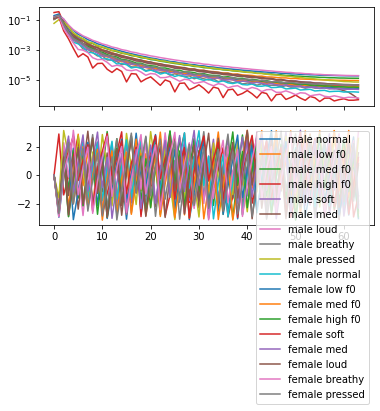

In [42]:
kpars= ['F0','RG','RE','RA','OQ']
labs = [ 'gender','Mode']

t = np.linspace(0,1,100)
fig, ax = subplots(2, sharex=True)

for x in jexp.input(modjs):
    print
    thispars = {pp:x[pp] for pp in kpars}
    thislab = ' '.join(x[pp] for pp in labs)
    lf=lfm.LFModel()
    lf.from_karlsson(**thispars)
    flf = lf.fourier_components()
    
    ax[0].semilogy(np.abs(flf), label=thislab)
    ax[1].plot(np.angle(flf), label=thislab)
legend()